In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import warnings 
warnings.filterwarnings('ignore')

In [35]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

In [36]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [37]:
df = pd.DataFrame(housing_data.data)
df.columns = housing_data.feature_names
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [38]:
df['MedHouseVal'] = housing_data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [40]:
df.shape


(20640, 9)

In [41]:
df.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [42]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


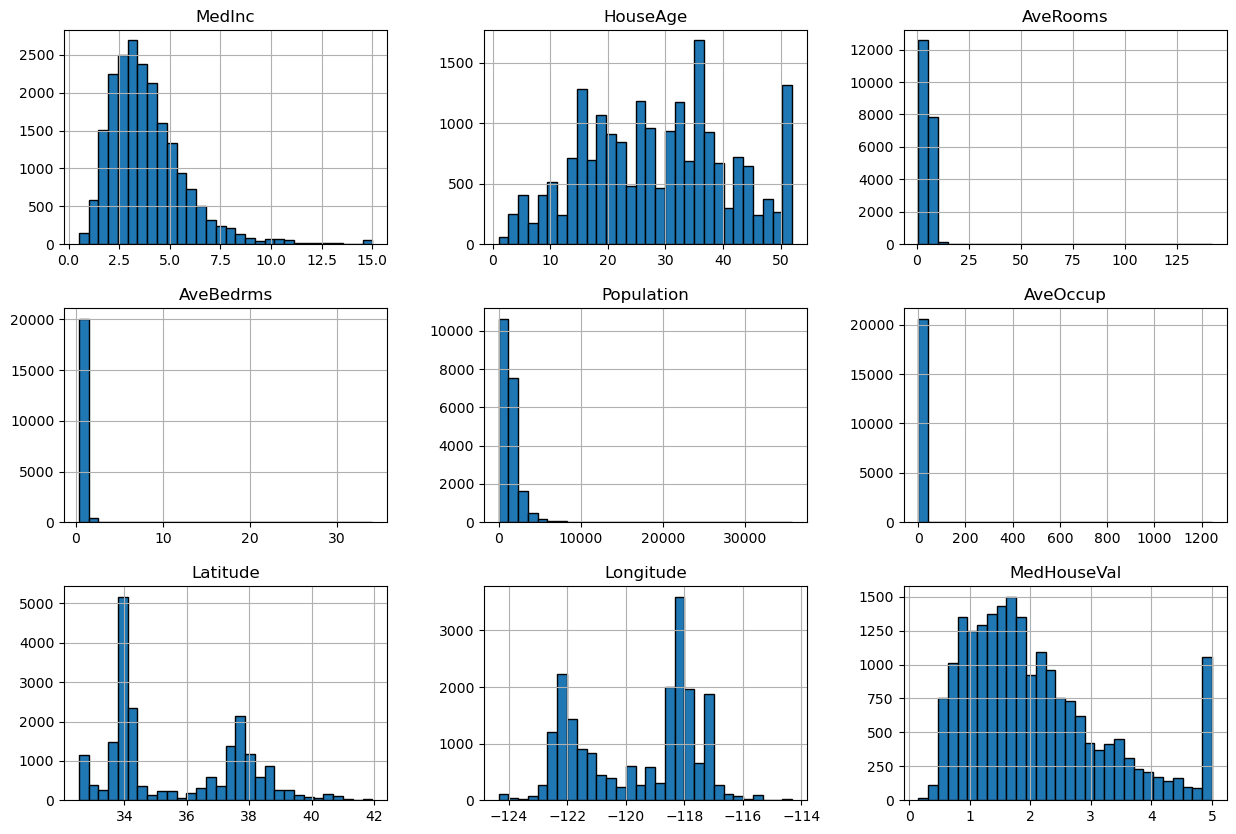

In [43]:
df.hist(figsize=(15,10), bins=30, edgecolor="black")
plt.show()

Text(0.5, 1.0, 'Median housing value depending on \n their spatial location')

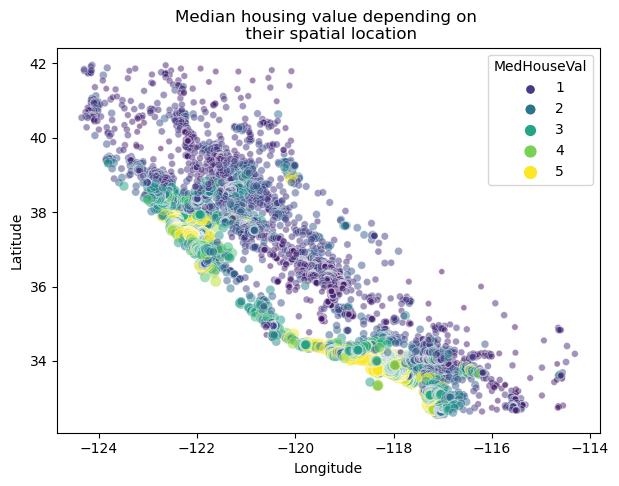

In [44]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="MedHouseVal", size="MedHouseVal",
               palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", loc="upper right")
plt.title("Median housing value depending on \n their spatial location")


Text(0.5, 1.0, 'Same plot without setting the hue and size para')

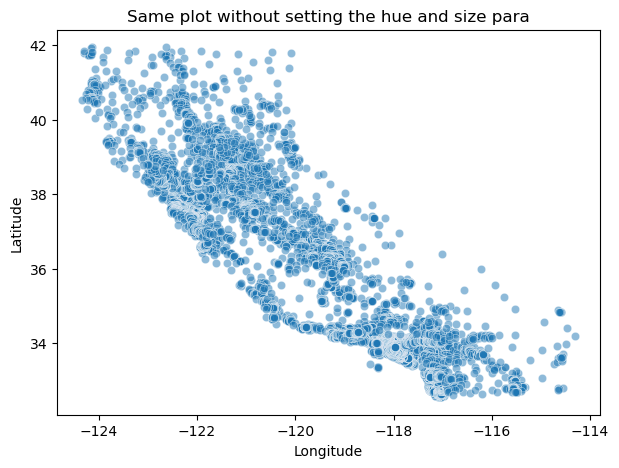

In [45]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Longitude", y="Latitude",
               palette="viridis", alpha=0.5)
plt.title("Same plot without setting the hue and size para")

In [46]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


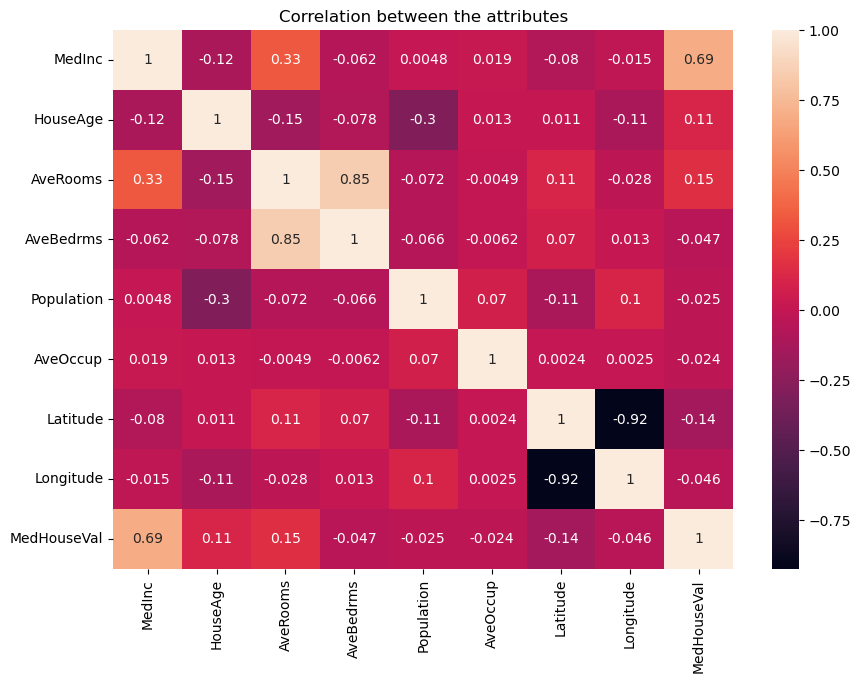

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between the attributes")
plt.show()

<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

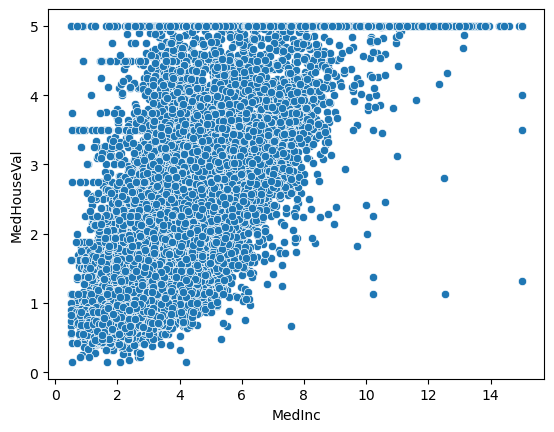

In [48]:
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])


<AxesSubplot:xlabel='AveRooms', ylabel='MedHouseVal'>

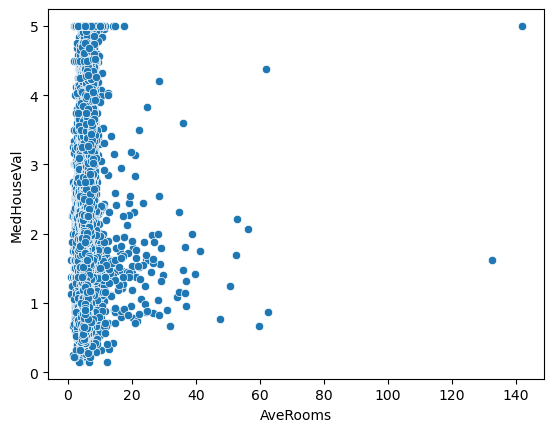

In [49]:
sns.scatterplot(x=df['AveRooms'], y=df['MedHouseVal'])

In [50]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (14448, 8)
X_test: (6192, 8)
y_train: (14448,)
y_test: (6192,)


In [53]:
scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# ### Linear Regression 


In [55]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)


In [56]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of the linear regression model is:", linreg_mae)
print("MSE of the linear regression model is:", linreg_mse)
print("R2 score of the linear regression model is:", linreg_r2)

MAE of the linear regression model is: 0.5272474538305953
MSE of the linear regression model is: 0.5305677824766752
R2 score of the linear regression model is: 0.5957702326061665


In [57]:
# ### Decision Tree 

In [58]:

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [59]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print("MAE of the decision tree model is:", dtree_mae)
print("MSE of the decision tree model is:", dtree_mse)
print("R2 score of the decision tree model is:", dtree_r2)

MAE of the decision tree model is: 0.4716225242248062
MSE of the decision tree model is: 0.5258529455437176
R2 score of the decision tree model is: 0.5993623795469639


In [60]:
# ### Random forest

In [61]:

rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)

In [62]:

rforest_mae = mean_absolute_error(y_test, rforest_pred)
rforest_mse = mean_squared_error(y_test, rforest_pred)
rforest_r2 = r2_score(y_test, rforest_pred)
print("MAE of the random forest model is:", rforest_mae)
print("MSE of the random forest model is:", rforest_mse)
print("R2 score of the random forest model is:", rforest_r2)

MAE of the random forest model is: 0.3295372183785532
MSE of the random forest model is: 0.2534081363130376
R2 score of the random forest model is: 0.8069330340425875


In [63]:
data = {'MedInc':7.325, 'HouseAge':30.0, 'AveRooms':5.984, 'AveBedrms':1.0238, 
        'Population':280, 'AveOccup':2.20,'Latitude':37.88, 'Longitude':-122.23}
index = [0]
new_df = pd.DataFrame(data, index)
new_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,7.325,30.0,5.984,1.0238,280,2.2,37.88,-122.23


In [64]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [65]:
value_pred = rforest.predict(new_df)
print("The median housing value for the new data is: ", value_pred)

The median housing value for the new data is:  [3.6417837]
